In [1]:
from PIL import Image
import numpy

In [2]:
im = Image.open("test.jpg")

In [3]:
help(im.split)

Help on method split in module PIL.Image:

split(self) method of PIL.JpegImagePlugin.JpegImageFile instance
    Split this image into individual bands. This method returns a
    tuple of individual image bands from an image. For example,
    splitting an "RGB" image creates three new images each
    containing a copy of one of the original bands (red, green,
    blue).
    
    :returns: A tuple containing bands.



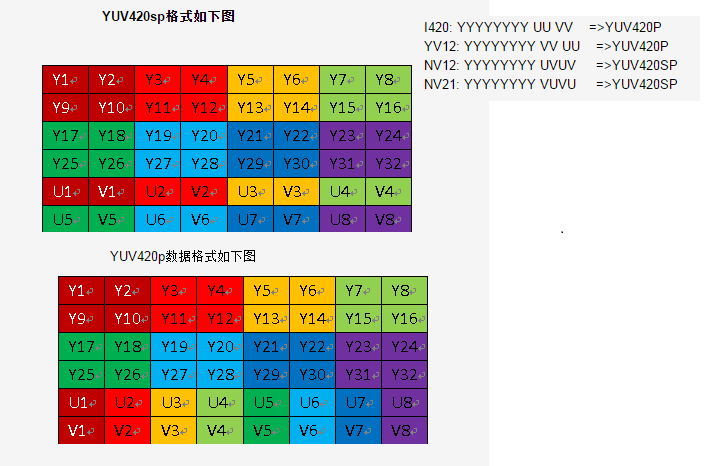

RGB :  0 	255 	1 
YVU :  145 	34 	54 

3110400.0


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
def my_jpg2nv21(im_jpg):
    "conver a jpg file to yuv file"
    #if(len(im_jpg.split())==4):
    #    r,g,b,a=im_jpg.split();
    #else:
    r,g,b=im_jpg.split();

    width,height=im_jpg.size;
    im_new=range(width*height*3/2);

    r = list(r.getdata());
    g = list(g.getdata());
    b = list(b.getdata());
    print '\033[31mRGB : ', r[0], '\t', g[0], '\t', b[0], '\033[0m\nYVU : ', 9*16+1, '\t', 2*16+2, '\t', 3*16+6, '\n'
    print 1920*1080*1.5
    # Y = 0.257R + 0.504G + 0.098B + 16
    # U = 0.148R - 0.291G + 0.439B + 128
    # V = 0.439R - 0.368G - 0.071B + 128

    for i in range(height):
        for j in range(width):
            index = i*width+j;
            R = r[index];
            G = g[index];
            B = b[index];
                     
            Y = 0.257*R + 0.504*G + 0.098*B + 16
            U = 0.148*R - 0.291*G + 0.439*B + 128
            V = 0.439*R - 0.368*G - 0.071*B + 128

            #print int(Y), int(U), int(V)
            
            # yuv420sp 把uv交叉储存, 储存在 width*height + index/2 和 width*height + index/2+1 位置
            # yuv420p 把uv分开储存, 储存在 width*height + index%4, width*height*1.25 + index%4 位置
            im_new[index] = chr(int(round(Y)))
            if (index % 4 == 0):
                # nv12格式则U在前
                im_new[width*height+index/2] = chr(int(round(V)))
                im_new[width*height+index/2+1] = chr(int(round(U)))

    print im_new

    return im_new;

from IPython.display import display
with Image.open("yuv_diff.png") as im2:
    display(im2)

# same as $ ffmpeg -i test.jpg -s 1920x1080 -pix_fmt nv21 test.yuv
im_yuv = my_jpg2nv21(im)

In [5]:
with open("test.nv21", "wb") as fp:
    data = numpy.array(im_yuv)
    data.tofile(fp)
    fp.close()
    print "save yuv file successfully"

save yuv file successfully


In [5]:
help(Image)

Help on module PIL.Image in PIL:

NAME
    PIL.Image

FILE
    /usr/lib/python2.7/dist-packages/PIL/Image.py

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # the Image class wrapper
    #
    # partial release history:
    # 1995-09-09 fl   Created
    # 1996-03-11 fl   PIL release 0.0 (proof of concept)
    # 1996-04-30 fl   PIL release 0.1b1
    # 1999-07-28 fl   PIL release 1.0 final
    # 2000-06-07 fl   PIL release 1.1
    # 2000-10-20 fl   PIL release 1.1.1
    # 2001-05-07 fl   PIL release 1.1.2
    # 2002-03-15 fl   PIL release 1.1.3
    # 2003-05-10 fl   PIL release 1.1.4
    # 2005-03-28 fl   PIL release 1.1.5
    # 2006-12-02 fl   PIL release 1.1.6
    # 2009-11-15 fl   PIL release 1.1.7
    #
    # Copyright (c) 1997-2009 by Secret Labs AB.  All rights reserved.
    # Copyright (c) 1995-2009 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    __builtin__.object
        Image
        ImagePoin